## Loading Necessary Python Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm #Read more about this python module

## Data Importing and Visualization

In [3]:
# Load the data from a CSV file or another suitable format.
# Replace 'data.xlsx' with the actual path to your data file.
lab1 = pd.read_excel(r"C:\Users\KAsab\Downloads\lab1-1.xlsx", header=None, names=[
    'salary', 'pcsalary', 'sales', 'roe', 'pcroe', 'ros',
    'indus', 'finance', 'consprod', 'utility', 'lsalary', 'lsales'
])

## Data on CEO Salary

| Variable    | Description                                  |
|-------------|----------------------------------------------|
| salary      | 1990 salary, thousands \$                     |
| pcsalary    | \% change salary, 89-90                      |
| sales       | 1990 firm sales, millions $                  |
| roe         | Return on equity, 88-90 avg                 |
| pcroe       | \% change roe, 88-90                         |
| ros         | Return on firm's stock, 88-90               |
| indus       | =1 if industrial firm                       |
| finance     | =1 if financial firm                        |
| consprod    | =1 if consumer product firm                 |
| utility     | =1 if transport or utilities                |
| lsalary     | Natural log of salary                       |
| lsales      | Natural log of sales                        |


In [3]:
# Assign variables
salary = lab1.iloc[:, 0]
pcsalary = lab1.iloc[:, 1]
sales = lab1.iloc[:, 2]
roe = lab1.iloc[:, 3]
pcroe = lab1.iloc[:, 4]
ros = lab1.iloc[:, 5]
indus = lab1.iloc[:, 6]
finance = lab1.iloc[:, 7]
consprod = lab1.iloc[:, 8]
utility = lab1.iloc[:, 9]
lsalary = lab1.iloc[:, 10]
lsales = lab1.iloc[:, 11]

## Basic statistics of variables

In [4]:
#input dataset in matrix lab
# Convert data to a NumPy array
lab = lab1.values

1. Let's compute the correlation matrix of the first 6 variables.

The first row denotes the correlation of salary with the other 5 variables.

| Variable    | Description                               |
|-------------|-------------------------------------------|
| salary      | 1990 salary, thousands \$                  |
| pcsalary    | % change salary, 89-90                   |
| sales       | 1990 firm sales, millions \$               |
| roe         | Return on equity, 88-90 avg              |
| pcroe       | % change roe, 88-90                      |
| ros         | Return on firm's stock, 88-90            |

|             | salary  | pcsalary  | sales   | roe     | pcroe   | ros     |
|-------------|---------|-----------|---------|---------|---------|---------|
| salary      |    1.00 |      X    |    X    |    X    |    X    |    X    |
| pcsalary    |    X    |      1.00 |    X    |    X    |    X    |    X    |
| sales       |    X    |      X    |    1.00 |    X    |    X    |    X    |
| roe         |    X    |      X    |    X    |    1.00 |    X    |    X    |
| pcroe       |    X    |      X    |    X    |    X    |    1.00 |    X    |
| ros         |    X    |      X    |    X    |    X    |    X    |    1.00 |


In [5]:
lab1[['salary',	'pcsalary',	'sales',	'roe',	'pcroe',	'ros']].describe()

,salary,pcsalary,sales,roe,pcroe,ros
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1281.119617,13.282297,6923.793301,17.184211,10.800478,61.803828
std,1372.345308,32.633921,10633.271159,8.518509,97.219400,68.177052
min,223.000000,-61.000000,175.200000,0.500000,-98.900000,-58.000000
25%,736.000000,-1.000000,2210.300000,12.400000,-21.200000,21.000000
50%,1039.000000,9.000000,3705.200000,15.500000,-3.000000,52.000000
75%,1407.000000,20.000000,7177.000000,20.000000,19.500000,81.000000
max,14822.000000,212.000000,97649.900000,56.300000,977.000000,418.000000


In [6]:
# Correlation matrix of the first six variables
corr_matrix = lab1[['salary',	'pcsalary',	'sales',	'roe',	'pcroe',	'ros']].corr()
corr_matrix

,salary,pcsalary,sales,roe,pcroe,ros
salary,1.000000,0.008672,0.119869,0.114842,0.028710,-0.033682
pcsalary,0.008672,1.000000,0.017010,0.087335,0.207962,0.137778
sales,0.119869,0.017010,1.000000,-0.055386,0.005594,-0.136088
roe,0.114842,0.087335,-0.055386,1.000000,0.004191,0.274919
pcroe,0.028710,0.207962,0.005594,0.004191,1.000000,0.128940
ros,-0.033682,0.137778,-0.136088,0.274919,0.128940,1.000000


In [7]:
#converting corr matrix to numpy array
print(corr_matrix.values)
print(f"Shape of corr matrix: {corr_matrix.shape}")

[[ 1.          0.0086722   0.11986949  0.11484174  0.02871044 -0.0336819 ]
 [ 0.0086722   1.          0.01701031  0.0873352   0.20796232  0.13777849]
 [ 0.11986949  0.01701031  1.         -0.05538572  0.00559404 -0.13608762]
 [ 0.11484174  0.0873352  -0.05538572  1.          0.0041911   0.2749188 ]
 [ 0.02871044  0.20796232  0.00559404  0.0041911   1.          0.12893956]
 [-0.0336819   0.13777849 -0.13608762  0.2749188   0.12893956  1.        ]]
Shape of corr matrix: (6, 6)


2. Which two variables exhibit the highest correlation with salary?
3.   Are these two variables highly correlated?

In [8]:
# Correlation between 'sales' and 'roe'
corr_sales_roe = lab1[['sales',	'roe']].corr()
corr_sales_roe

,sales,roe
sales,1.000000,-0.055386
roe,-0.055386,1.000000


Our candidate measures of  firm performance to relate to salary are sales and roe.

Before proceeding, let's visualize the empirical distribution of salary, sales, and roe  with histograms

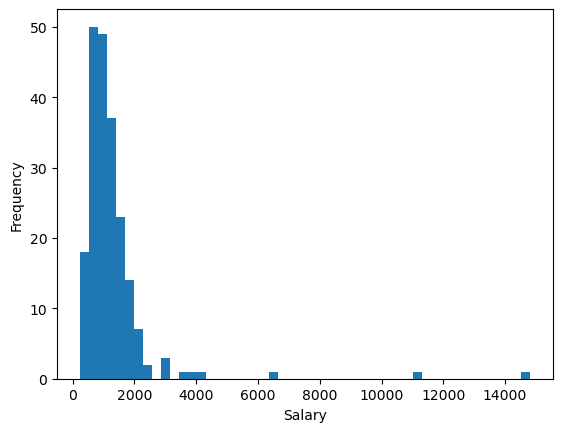

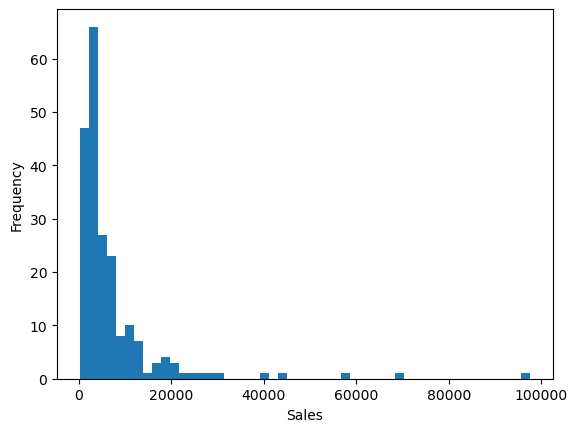

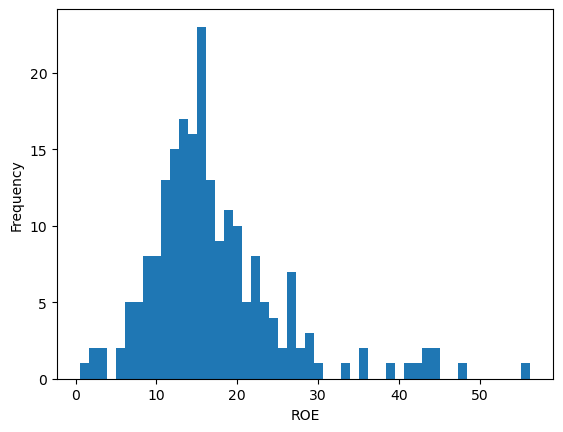

In [9]:
# Create histograms
plt.hist(salary, bins=50)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

plt.hist(sales, bins=50)
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

plt.hist(roe, bins=50)
plt.xlabel('ROE')
plt.ylabel('Frequency')
plt.show()

4.   Comment on the results

Let's now look first at a scatter plot of salary (y axis)  and  sales (x axis)

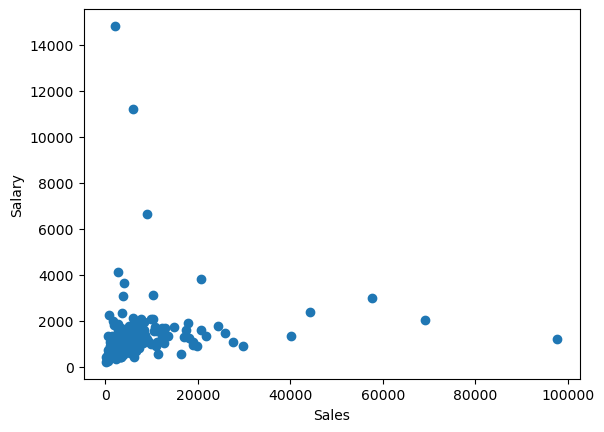

In [10]:
# Scatter plots
plt.scatter(sales, salary)
plt.xlabel('Sales')
plt.ylabel('Salary')
plt.show()

5. Would you expect to find a linear relationship between these two variables?

Let's now look at a scatter plot of salary (y axis)  and  roe (x axis)

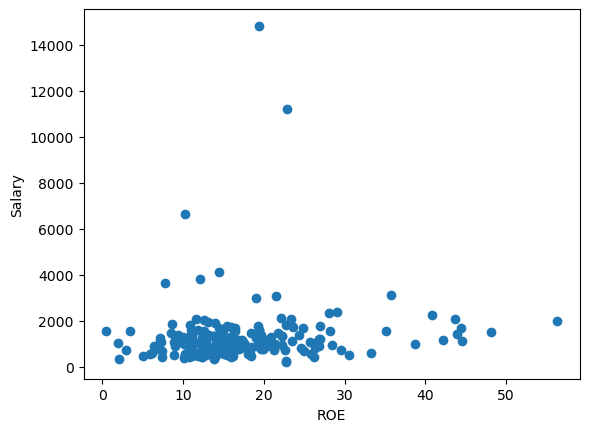

In [11]:
plt.scatter(roe, salary)
plt.xlabel('ROE')
plt.ylabel('Salary')
plt.show()

6. Would you expect to find a linear relationship between these two variables?

Let's estimate a simple univariate regression with salary and roe, and plot the results

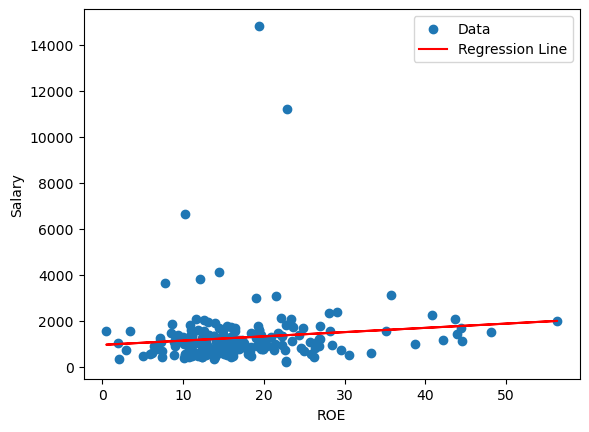

In [12]:
X = sm.add_constant(roe)

# Fit a linear regression model
model = sm.OLS(salary, X).fit()

# Plot the regression line
plt.scatter(roe, salary, label='Data')
plt.plot(roe, model.predict(X), color='red', label='Regression Line')
plt.xlabel('ROE')
plt.ylabel('Salary')
plt.legend()
plt.show()

7. Comment the results

Now, let's estimate a regression with salary and sales

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     3.018
Date:                Sat, 28 Oct 2023   Prob (F-statistic):             0.0838
Time:                        11:53:45   Log-Likelihood:                -1804.4
No. Observations:                 209   AIC:                             3613.
Df Residuals:                     207   BIC:                             3620.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1174.0049    112.813     10.407      0.0

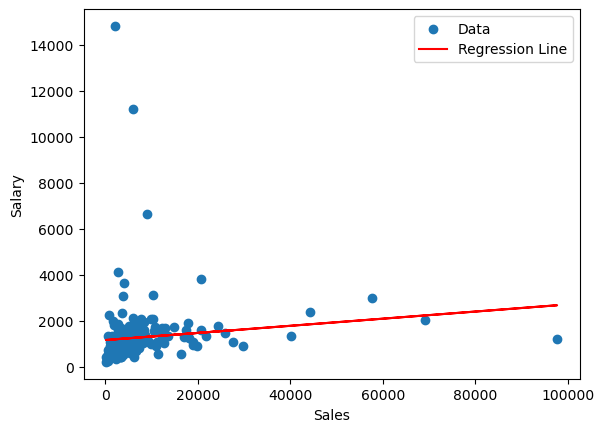

In [13]:
# Create the independent variable (X) and add a constant term
X = sm.add_constant(sales)

# Fit a linear regression model
model = sm.OLS(salary, X).fit()
print(model.summary())

# Plot the regression line
plt.scatter(sales, salary, label='Data')
plt.plot(sales, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Sales')
plt.ylabel('Salary')
plt.legend()
plt.show()

7. Comment the results, and compare them with the previous regression

Are there non-linearities in the data?<br>
Let' now consider to incorporate non-linearities <br>
Let's run a regression with logsalary and logsales as a predictor<br>

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     55.30
Date:                Sat, 28 Oct 2023   Prob (F-statistic):           2.70e-12
Time:                        11:53:47   Log-Likelihood:                -152.50
No. Observations:                 209   AIC:                             309.0
Df Residuals:                     207   BIC:                             315.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8220      0.288     16.723      0.0

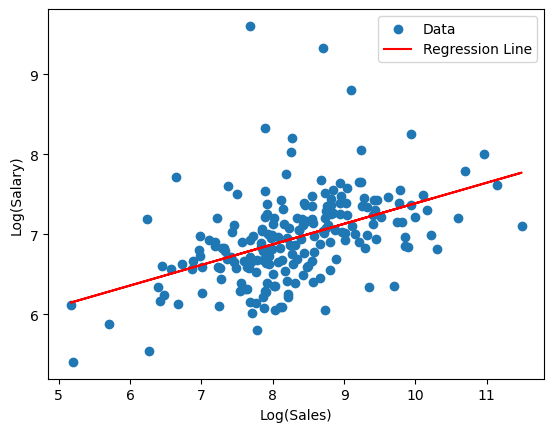

In [14]:
logsalary = np.log(lab1['salary'])
logsales = np.log(lab1['sales'])
X = sm.add_constant(logsales)

# Fit a linear regression model
model = sm.OLS(logsalary, X).fit()
print(model.summary())

# Plot the regression line
plt.scatter(logsales, logsalary, label='Data')
plt.plot(logsales, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Log(Sales)')
plt.ylabel('Log(Salary)')
plt.legend()
plt.show()

8. Comment the results, and compare with the previous level regression

Finally, as a preview of incoming exercises, we noticed sales and roe have a positive correlation with salary, but their correlation is small. <br>
Let's see a scatter plot of sales and roe

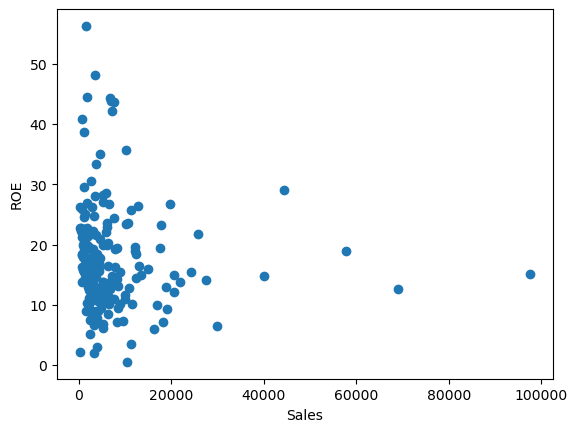

In [15]:
plt.scatter(sales, roe)
plt.xlabel('Sales')
plt.ylabel('ROE')
plt.show()

Could a regression with both sales and roe improve the fit of the original one variable regressions?<br>
Let's check this multivariate regression

In [16]:
X = sm.add_constant(pd.DataFrame({'Sales': sales, 'ROE': roe}))

# Fit a multiple linear regression model
model = sm.OLS(salary, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     3.095
Date:                Sat, 28 Oct 2023   Prob (F-statistic):             0.0474
Time:                        11:53:52   Log-Likelihood:                -1802.8
No. Observations:                 209   AIC:                             3612.
Df Residuals:                     206   BIC:                             3622.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        830.6313    223.905      3.710      0.0